### Import libraries

In [1]:
import lyricsgenius
import json 
import ijson
import pandas as pd
import nltk
nltk.download('stopwords')
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize.treebank import TreebankWordDetokenizer
from PIL import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Generate the data

In [2]:
token = "qDTVjrDg088wOHbHgGR6m_uu7PhRlkEQ1h15Z_jF-YSdRXe2_21PtAexrAHLC0Xs"
genius = lyricsgenius.Genius(token)

In [3]:
#album = genius.search_album("Shore", "Fleet Foxes")
#album.save_lyrics()

In [4]:
# Opening JSON file 
f = open('Lyrics_Shore.json') 
data = json.load(f) 

g = open('Lyrics_Shore.json', 'r')
parser = ijson.parse(g)
paths = sorted(set(prefix for prefix, event, value in parser if prefix))

for path in paths:
    print(path)

_type
api_path
artist
artist._type
artist.api_path
artist.header_image_url
artist.id
artist.image_url
artist.index_character
artist.iq
artist.is_meme_verified
artist.is_verified
artist.name
artist.slug
artist.url
cover_art_thumbnail_url
cover_art_url
full_title
id
name
name_with_artist
release_date_components
release_date_components.day
release_date_components.month
release_date_components.year
songs
songs.item
songs.item._type
songs.item.annotation_count
songs.item.api_path
songs.item.artist
songs.item.full_title
songs.item.header_image_thumbnail_url
songs.item.header_image_url
songs.item.id
songs.item.instrumental
songs.item.lyrics
songs.item.lyrics_owner_id
songs.item.lyrics_state
songs.item.lyrics_updated_at
songs.item.path
songs.item.primary_artist
songs.item.primary_artist._type
songs.item.primary_artist.api_path
songs.item.primary_artist.header_image_url
songs.item.primary_artist.id
songs.item.primary_artist.image_url
songs.item.primary_artist.index_character
songs.item.primary_

In [5]:
# i just wanna make sure the album is complete
for i in data['songs']:
    print(i['title'])

Wading in Waist-High Water
Sunblind
Can I Believe You
Jara
Featherweight
A Long Way Past the Past
For a Week or Two
Maestranza
Young Man’s Game
I’m Not My Season
Quiet Air / Gioia
Going-to-the-Sun Road
Thymia
Cradling Mother, Cradling Woman
Shore


In [6]:
# extract title and lyrics into dict
df = []
for i in data['songs']:
    df.append({'title': i["title"], 'lyrics': i["lyrics"]})

In [7]:
shore = pd.DataFrame(df)
shore

,title,lyrics
0,Wading in Waist-High Water,[Verse 1]\nSummer all over\nBlame it on timing...
1,Sunblind,[Verse 1]\nFor Richard Swift\nFor John and Bil...
2,Can I Believe You,Can I believe you?\nCan I believe you?\nCan I\...
3,Jara,First sight of the first good morning since yo...
4,Featherweight,[Verse 1]\nAll this time I've been hanging on\...
5,A Long Way Past the Past,[Verse 1]\nMore than I had in mind\nMore than ...
6,For a Week or Two,Some lost coast\nSome bright days\nNo face on ...
7,Maestranza,[Verse 1]\nMonday night\nLoud in the road outs...
8,Young Man’s Game,"Perfect\n\nNew day rising, come close the blue..."
9,I’m Not My Season,[Verse 1]\nBlood of my blood\nSkin of my skin\...


### Cleansing

In [8]:
#remove punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
shore['lyrics']=shore['lyrics'].apply(lambda x: remove_punctuation(x))

In [9]:
shore['lyrics'] = shore['lyrics'].str.replace(r'Verse', '')
shore['lyrics'] = shore['lyrics'].str.replace(r'Chorus', ' ')
shore['lyrics'] = shore['lyrics'].str.replace(r'Outro', ' ')
shore['lyrics'] = shore['lyrics'].str.replace(r'\n', ' ')
shore['lyrics'] = shore['lyrics'].str.replace(r'\u2005', ' ')
shore['lyrics'] = shore['lyrics'].str.replace('\d+', '')
shore['lyrics'] = shore['lyrics'].str.lower()
shore['lyrics'] = shore['lyrics'].str.split()
shore

,title,lyrics
0,Wading in Waist-High Water,"[summer, all, over, blame, it, on, timing, wea..."
1,Sunblind,"[for, richard, swift, for, john, and, bill, fo..."
2,Can I Believe You,"[can, i, believe, you, can, i, believe, you, c..."
3,Jara,"[first, sight, of, the, first, good, morning, ..."
4,Featherweight,"[all, this, time, ive, been, hanging, on, to, ..."
5,A Long Way Past the Past,"[more, than, i, had, in, mind, more, than, i, ..."
6,For a Week or Two,"[some, lost, coast, some, bright, days, no, fa..."
7,Maestranza,"[monday, night, loud, in, the, road, outside, ..."
8,Young Man’s Game,"[perfect, new, day, rising, come, close, the, ..."
9,I’m Not My Season,"[blood, of, my, blood, skin, of, my, skin, you..."


In [10]:
# remove stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
shore['filtered_words'] = shore['lyrics'].apply(lambda x: remove_stopwords(x))

In [11]:
shore['words_count'] = shore['lyrics'].str.len()
shore['filtered_words_count'] = shore['filtered_words'].str.len()
shore['lexical_richness'] = shore['filtered_words_count']/shore['words_count']*100

In [12]:
def detokenize(text):
    de = TreebankWordDetokenizer().detokenize(text)
    return de

shore['clean_lyrics'] = shore['filtered_words'].apply(lambda x: detokenize(x))

shore['clean_lyrics'] = shore['clean_lyrics'].str.replace(r'im', ' ')
shore['clean_lyrics'] = shore['clean_lyrics'].str.replace(r'youre', ' ')
shore['clean_lyrics'] = shore['clean_lyrics'].str.replace(r'ive', ' ')

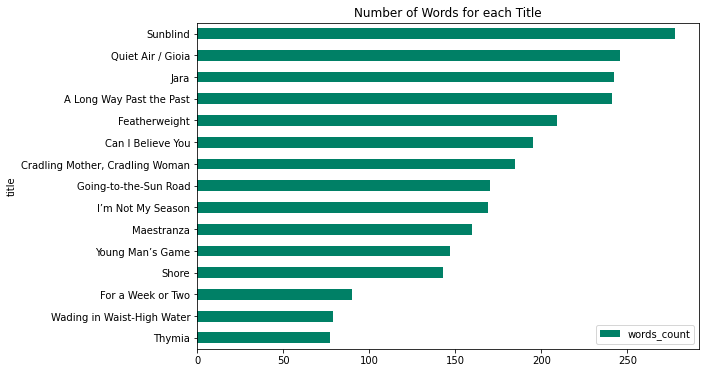

In [36]:
# count of words from each title
shore = shore.sort_values('words_count')
shore.plot.barh(x='title', y='words_count', figsize=(9,6), colormap='summer', title='Number of Words for each Title');

<AxesSubplot:title={'center':'Lexical Richness for each Title'}, ylabel='title'>

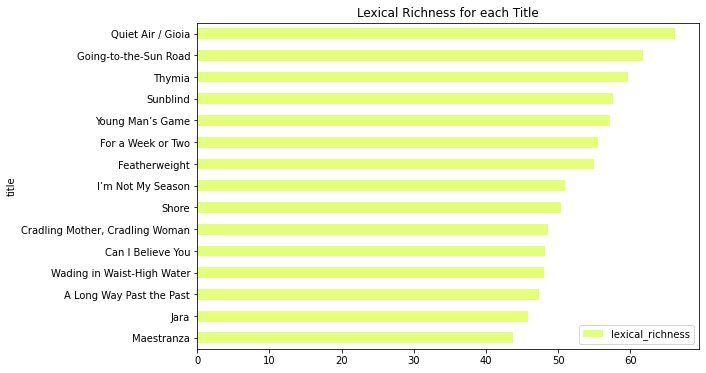

In [41]:
# lexical richness from each title
shore = shore.sort_values('lexical_richness')
shore.plot.barh(x='title', y='lexical_richness', figsize=(9,6), colormap='Wistia', title='Lexical Richness for each Title')

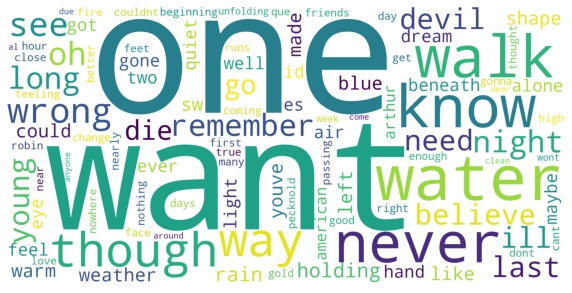

In [44]:
X = shore['clean_lyrics']
vectorizer = CountVectorizer()
text_vec = vectorizer.fit_transform(X.values.astype('U'))
word_count = pd.DataFrame(text_vec.toarray(), columns=vectorizer.get_feature_names())

word_list = vectorizer.get_feature_names()
count_list = text_vec.toarray().sum(axis=0) 
word_freq = dict(zip(word_list,count_list))
#sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# wordcloud most frequent words
wcp = WordCloud(background_color="white",width=2000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_freq)
plt.figure(figsize=(10,8))
plt.imshow(wcp)
plt.axis('off')
plt.show()

In [16]:
# vader sentiment analysis
analyzer = SentimentIntensityAnalyzer()
shore['compound'] = [analyzer.polarity_scores(x)['compound'] for x in shore['clean_lyrics']]
shore['neg'] = [analyzer.polarity_scores(x)['neg'] for x in shore['clean_lyrics']]
shore['neu'] = [analyzer.polarity_scores(x)['neu'] for x in shore['clean_lyrics']]
shore['pos'] = [analyzer.polarity_scores(x)['pos'] for x in shore['clean_lyrics']] 

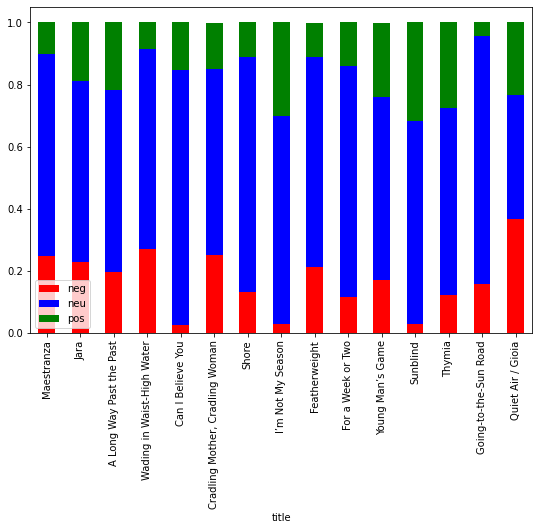

In [45]:
sentiment = pd.DataFrame()
sentiment = shore[['title', 'neg', 'neu', 'pos']]
sentiment.plot.bar(x='title', stacked=True, figsize=(9,6), color={'pos': 'green', 'neg': 'red', 'neu': 'blue'})
plt.show()

In [18]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

<AxesSubplot:title={'center':'Sentiment for each Title using NRC'}, xlabel='title'>

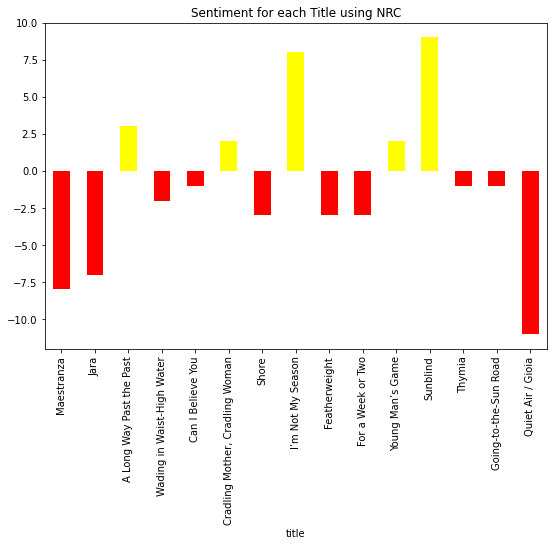

In [54]:
# sentiment using NRC
def sentiment(sentence):
  senti=0
  words = [word for word in sentence]
  for word in words:
    if word in pos_list:
      senti += 1
    elif word in neg_list:
      senti -= 1
  return senti

shore['sentiment']=shore['filtered_words'].apply(sentiment)
shore['is_positive'] = shore['sentiment'] > -0
#shore.plot.bar(x='title', y='sentiment', title='Sentiment for each Title using NRC', figsize=(9,6), color=[shore.is_positive.map({True: 'blue', False: 'red'})])
shore[['title', 'sentiment']].plot(x='title', kind='bar',  title='Sentiment for each Title using NRC', figsize=(9,6), legend= False, color=[shore.is_positive.map({True: 'yellow', False: 'red'})])

In [20]:
# pos neg words classified
pos_dic = list(pos_list)
neg_dic = list(neg_list)

a = shore['filtered_words']
pos_word = []
neg_word = []
all_words = []
for sublist in a:
    for item in sublist:
        all_words.append(item)

for word in all_words:
    if word in pos_dic:
        pos_word.append(word)
    elif word in neg_dic:
        neg_word.append(word)

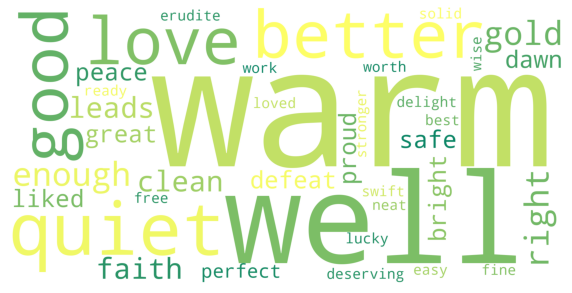

In [47]:
# wordcloud for positive words
unique_string=(" ").join(pos_word)
wcp = WordCloud(background_color="white",width=2000,height=1000, max_words=1000,relative_scaling=0.5,normalize_plurals=False, colormap="summer").generate(unique_string)
plt.figure(figsize=(10,8))
plt.imshow(wcp)
plt.axis('off')
plt.show()

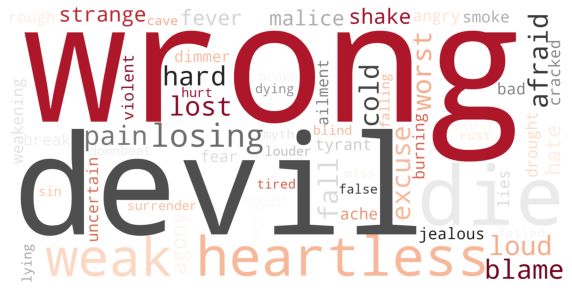

In [48]:
# wordcloud for negative words
unique_string=(" ").join(neg_word)
wcp = WordCloud(background_color="white",width=2000,height=1000, max_words=1000,relative_scaling=0.5,normalize_plurals=False, colormap="RdGy").generate(unique_string)
plt.figure(figsize=(10,8))
plt.imshow(wcp)
plt.axis('off')
plt.show()